## Introduction

Bellabeat is a small high-tech manufacturer of health-focused smart products for women that has potential for tremendous growth in the smart device market share.
Founded in 2013, by Urška Sršen and Sando Mur, Bellabeat has a line of products, apps and services that inform and inspire women with knowledge about their health and habits. Sršen used her background as an artist to develop beautifully designed technology that is both aesthetic as well as functional, using data collected of activity, sleep, stress, and reproductive health to improve their customers wellbeing.  

In 2016, Bellabeat expanded worldwide with multiple products available through several online retailers in addition to their own e-commerce channel on their website. Their extensive digital marketing via Google Search, Facebook, Instagram, and Youtube grants them a expansive network to reach many consumers. 
Stakeholders believe that there is a large opportunity for growth by leveraging available consumer data.  

This report prodives an analysis of smart device usage and their metrics to gain insight on how people are already using them, and recommendations on how these trends can inform the Bellabeat marketing strategy. 

### Business Task

Stakeholders believe that there is a large opportunity for growth by leveraging available consumer data. This report provides an analysis of smart device usage and their metrics to gain insight on how people are already using them, and recommendations on how these trends can inform the Bellabeat marketing strategy team. 

### Dependencies

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import random
import secrets
import sqlite3
from collections import Counter
from scipy import stats
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import xgboost as xgb
# from itertools import cycle
sns.set_style('whitegrid')

Functions created specifically for this casestudy are saved in a seperate file, `bellabeat_fitbit_analysis_functions.py` and loaded in here. Use this file as reference for more detail on how the data is specfically processed, analyzed or visualized.

In [2]:
# functions written specifically to analyze bellabeat/fitbit data
from bellabeat_fitbit_analysis_functions import *

## Data

The dataset used for this analysis is a series of FitBit Fitness Tracker .CSV files made available for public domain through Mobius posted on Kaggle. The data contains personal fitness information from 30 different FitBit users. The 30 eligible users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.

The preprocessed original files were downloaded from this kaggle link here: https://www.kaggle.com/datasets/arashnic/fitbit and stored in a 'data' folder. Below is a list of .csv files included

In [3]:
files = os.listdir('data/')
for file in files:
    if file.endswith('.csv'):
        print(file)

dailyActivity_merged.csv
dailyCalories_merged.csv
dailyIntensities_merged.csv
dailySteps_merged.csv
heartrate_seconds_merged.csv
hourlyCalories_merged.csv
hourlyIntensities_merged.csv
hourlySteps_merged.csv
minuteCaloriesNarrow_merged.csv
minuteCaloriesWide_merged.csv
minuteIntensitiesNarrow_merged.csv
minuteIntensitiesWide_merged.csv
minuteMETsNarrow_merged.csv
minuteSleep_merged.csv
minuteStepsNarrow_merged.csv
minuteStepsWide_merged.csv
sleepDay_merged.csv
weightLogInfo_merged.csv


#### Null Value Check

The only raw data file that contains null values in `weightLogInto_merged.csv`, however the data is too sparse to get any reliable insight, so it will just be ignored and not used for analysis.

In [4]:
files = os.listdir('data/')
for file in files:
    if file.endswith('.csv'):
        df = pd.read_csv(f'data/{file}')
        if df.isnull().any().any():
            print(f'{file} contains null values')

weightLogInfo_merged.csv contains null values


#### Duplicated Row Check

There are 2 raw data files that contain duplicate rows, `minuteSleep_merged.csv` and `sleepDay_merged.csv`. These two cases will be handled individually and then saved under the `data/` folder with the suffix `_cleaned_merged.csv` to maintain the raw data files.

In [5]:
files = os.listdir('data/')
for file in files:
    if file.endswith('.csv'):
        df = pd.read_csv(f'data/{file}')
        if df.duplicated().any().any():
            print(file)
            duplicates = df[df.duplicated()]
            print(f'{duplicates.shape[0]} duplicates')
            file_name = f'{file[:-11]}_cleaned_merged.csv'
            df.drop_duplicates(inplace=True)
            df.to_csv(f'data/{file_name}', index=False)

minuteSleep_merged.csv
543 duplicates
sleepDay_merged.csv
3 duplicates


## Processing

Some files were just _processed_ as opposed to _generated_ meaning that datetime related observations were seperated by month, day, hour, and minute (if applicable), as opposed to being aggregated either by total or average for a specified time interval. Such as heartrate being originally in seconds and then transformed into minute and hour averages. Proccessing file are done with the function `loadAndProcess()`, loads the `.csv` files, makes the proper datetime columns and then saves a new `.csv` file with the `_processed` suffix after the filename. Only the Narrow versions of the data are chosen as the Wide versions are redundent and are more difficult to perform analysis on. 

The `loadAndProcess()` function which can be seen in the `bellabeat_fitbit_analysis_functions.py` along with the `make_dt_columns_[datetime interval]` functions that are called in `loadAndProcess()` during processing.

#### Processing Seconds Files

In [6]:
# heartrate_seconds
loadAndProcess('heartrate_seconds', 'second', 'Time', ['Value'])

heartrate_seconds processed


#### Processing Minute Files

In [7]:
# minuteCaloriesNarrow
loadAndProcess('minuteCaloriesNarrow', 'minute', 'ActivityMinute', ['Calories'])
# minuteIntensitiesNarrow
loadAndProcess('minuteIntensitiesNarrow', 'minute', 'ActivityMinute', ['Intensity'])
# minuteStepsNarrow
loadAndProcess('minuteStepsNarrow', 'minute', 'ActivityMinute', ['Steps'])
# minuteMETsNarrow
loadAndProcess('minuteMETsNarrow', 'minute', 'ActivityMinute', ['METs'])
# minuteSleep
loadAndProcess('minuteSleep', 'minute', 'date', ['value', 'logId'], cleaned=True)

minuteCaloriesNarrow processed
minuteIntensitiesNarrow processed
minuteStepsNarrow processed
minuteMETsNarrow processed
minuteSleep processed


#### Processing Hourly Files

In [8]:
# hourlyCalories
loadAndProcess('hourlyCalories', 'hour', 'ActivityHour', ['Calories'])
# hourlyIntensities
loadAndProcess('hourlyIntensities', 'hour', 'ActivityHour', ['TotalIntensity', 'AverageIntensity'])
# hourlySteps
loadAndProcess('hourlySteps', 'hour', 'ActivityHour', ['StepTotal'])

hourlyCalories processed
hourlyIntensities processed
hourlySteps processed


#### Processing Daily Files

In [9]:
# dailyActivity
loadAndProcess('dailyActivity', 'day', 'ActivityDate', [''])
# dailyCalories
loadAndProcess('dailyCalories', 'day', 'ActivityDay', [''])
# dailyIntensities
loadAndProcess('dailyIntensities', 'day', 'ActivityDay', [''])
# dailySteps
loadAndProcess('dailySteps', 'day', 'ActivityDay', [''])
# dailySleep
loadAndProcess('sleepDay', 'day', 'SleepDay', [''], cleaned=True)

dailyActivity processed
dailyCalories processed
dailyIntensities processed
dailySteps processed
sleepDay processed


### Generating Files

#### Minute Heartrate Generated

In [10]:
loadAndGenerate_minuteHeartrate()

minuteHeartrate generated


#### Hourly Heartrate Generated

In [11]:
loadAndGenerate_hourlyHeartrate()

hourlyHeartrate generated


#### Hourly METs Generated

In [12]:
loadAndGenerate_hourlyMETs()

hourlyMETs generated


#### Daily METs Generated

In [13]:
loadAndGenerate_dailyMETS()

dailyMETs generated


#### Hourly Sleep Generated

In [14]:
loadAndGenerate_hourlySleep()

hourlySleep generated


#### Daily Sleep Generated

In [15]:
loadAndGenerate_dailySleep()

dailySleep generated


#### Post Processing Duplicate Check

In [16]:
files = os.listdir('data_processed/')
for file in files:
    if file.endswith('.csv'):
        df = pd.read_csv(f'data_processed/{file}')
        if df.duplicated().any().any():
            print(file)
            duplicates = df[df.duplicated()]
            print(f'{duplicates.shape[0]} duplicates')

No files were returned, therefore there are no duplicates in any of the processed files.

## Create and Populate SQL Database

In [17]:
createAndPopulate_database('data_processed/')

SQL Database created and populated


In [18]:
populateTables('data_processed/')

In [19]:
os.rename('data_processed/sleepDay_processed.csv', 'data_processed/dailySleep_processed.csv')
rename_query = "ALTER TABLE sleepDay_processed RENAME TO dailySleep_processed;"
sql_execute(rename_query)

#### Data Integrity

The maximum amount of participants recorded for a given table is 33, while some go as low as 14 `__(weightLog 8 may include)__`. This means the veracity of some of the features analyzed is limited. Data collected from the participants are anonymized to protect their privacy, making the data not quite as comprehensive as it could be, however more general observations can be made. Features such as daily activity, calories burnt, intensities of exercise,  steps, heartrate, METs, and sleep can still lead to quality insight when analyzing patterns of user smart device use. Although the data was collected in April and May of 2016, meaning it is several years old, it seems unlikely that user behavior has changed significantly since then.

In [20]:
# Iterates through each .csv file 
# and checks the number of unique Ids for given table
files = os.listdir('data_processed/')
uniqueIds_dict = {}
for file in files:
    if file.endswith('.csv'):
        table_name = file[:-4]
        query = f"""SELECT COUNT(DISTINCT Id)
                    FROM {table_name};"""
        result = sql_query(query)
        uniqueIds_dict[table_name] = result[0][0] 
rankedBy_uniqueIds = sorted(uniqueIds_dict.items(), key=lambda x: x[1], reverse=True)
for item in rankedBy_uniqueIds:
    print(item[0], item[1])

dailyActivity_processed 33
dailyCalories_processed 33
dailyIntensities_processed 33
dailyMETsNarrow_generated 33
dailySteps_processed 33
hourlyCalories_processed 33
hourlyIntensities_processed 33
hourlyMETs_generated 33
hourlySteps_processed 33
minuteCaloriesNarrow_processed 33
minuteIntensitiesNarrow_processed 33
minuteMETsNarrow_processed 33
minuteStepsNarrow_processed 33
dailySleep_generated 24
dailySleep_processed 24
hourlySleep_generated 24
minuteSleep_processed 24
heartrate_seconds_processed 14
hourlyHeartrate_generated 14
minuteHeartrate_generated 14


## Analysis & Visuals

#### Daily Descriptive Statistics

Below are additional features generated from the processed data for more effective analysis and greater insight.

In [21]:
### DailyActivity data loaded into useful DataFrame format
dailyActivity = pd.read_csv('data_processed/dailyActivity_processed.csv')
dailyActivity['ModeratelyActiveMinutes'] = dailyActivity[['VeryActiveMinutes', 'FairlyActiveMinutes']].apply(lambda x: (x.values.sum()), axis="columns")
dailyActivity['ActiveMinutes'] = dailyActivity[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes']].apply(lambda x: (x.values.sum()), axis="columns")
dailyActivity['Id_dt_string'] = dailyActivity[['Id', 'dtString']].apply(lambda x: ' '.join(x.values.astype(str)), axis="columns")

In [22]:
# check to make sure the columns with combined activity minutes are calculated properly 
dailyActivity['ModeratelyActiveMinutes_delta'] = dailyActivity[['VeryActiveMinutes', 'FairlyActiveMinutes', 'ModeratelyActiveMinutes']].apply(lambda x: (x.values[2] - (x.values[0] + x.values[1])), axis="columns")
dailyActivity['ActiveMinutes_delta'] = dailyActivity[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'ActiveMinutes']].apply(lambda x: (x.values[3] - (x.values[0] + x.values[1] + x.values[2])), axis="columns")
ModeratelyActiveCol_check = dailyActivity[dailyActivity['ModeratelyActiveMinutes_delta'] > 0].shape
print('ModeratelyActiveMinutes column is calculated properly:')
print(f'{ModeratelyActiveCol_check[0] == 0}')
ActiveCol_check = dailyActivity[dailyActivity['ActiveMinutes_delta'] > 0].shape
print('ActiveMinutes column is calculated properly:')
print(f'{ActiveCol_check[0] == 0}')
dailyActivity = dailyActivity.drop(columns=['ModeratelyActiveMinutes_delta', 'ActiveMinutes_delta'])

ModeratelyActiveMinutes column is calculated properly:
True
ActiveMinutes column is calculated properly:
True


In [23]:
### DailySleep data loaded into useful DataFrame format
dailySleep_query = """SELECT  a.Id, a.dtString, a.wkDay, a.TotalSteps, a.TotalDistance, a.VeryActiveMinutes,  
                        a.FairlyActiveMinutes, a.LightlyActiveMinutes, a.SedentaryMinutes, a.Calories,  
                        s.totalSleepMinute, s.totalSleepQuality, sl.TotalTimeInBed
                      FROM dailyActivity_processed a  
                      JOIN dailySleep_generated s ON s.Id = a.Id AND s.dtString = a.dtString   
                      JOIN dailySleep_processed sl ON sl.Id = a.Id AND sl.dtString = a.dtString; """

# call sql_query() and turn into a DataFrame
dailySleep_query_result = sql_query(dailySleep_query)
col_names = ['Id', 'dtString', 'wkDay', 'TotalSteps', 'TotalDistance', 'VeryActiveMinutes',  
             'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 
             'Calories', 'totalSleepMinute', 'totalSleepQuality', 'TotalTimeInBed']
dailySleep = pd.DataFrame(dailySleep_query_result, columns = col_names)

dailySleep['SleepRatio'] = dailySleep['totalSleepQuality'] / dailySleep['totalSleepMinute']
dailySleep['totalSleepHour'] = round(dailySleep['totalSleepMinute'] / 60, 2)
dailySleep['TotalTimeInBedHour'] = round(dailySleep['TotalTimeInBed'] / 60, 2)
dailySleep['Id_dt_string'] = dailySleep[['Id', 'dtString']].apply(lambda x: ' '.join(x.values.astype(str)), axis="columns")

In [24]:
dailyStatistics = dailyActivity.merge(dailySleep, on='Id_dt_string', how='inner', suffixes=['_activity', '_sleep'])
dailyStatistics = dailyStatistics[['Id_activity', 'dtString_activity', 'month', 'day', 'wkDay_activity', 'TotalSteps_activity', 'TotalDistance_activity', 'TrackerDistance',
                    'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance',
                    'VeryActiveMinutes_activity', 'FairlyActiveMinutes_activity', 'LightlyActiveMinutes_activity','SedentaryMinutes_activity', 'ModeratelyActiveMinutes',
                    'ActiveMinutes', 'totalSleepMinute', 'totalSleepQuality', 'TotalTimeInBed', 'SleepRatio', 'totalSleepHour', 'TotalTimeInBedHour', 'Calories_activity']]

dailyStatistics.columns = ['Id', 'dtString', 'month', 'day', 'wkDay', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
                    'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance',
                    'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes','SedentaryMinutes', 'ActiveMinutes', 'ModeratelyActiveMinutes', 
                    'totalSleepMinute', 'totalSleepQuality', 'TotalTimeInBed', 'SleepRatio', 'totalSleepHour', 'TotalTimeInBedHour', 'Calories']

In [25]:
# Saving dailyStatistics as a .csv file with a _generated
dailyStatistics.to_csv('data_processed/dailyStatistics_generated.csv')

In [26]:
# get relevant variable means from DailyActivity
columns1 = ['TotalSteps', 'TotalDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']
mean_dict = {}
for col in columns1:
    if col[-7:] == 'Minutes':
        dict_name = f'{col[:-7]}Hours'
        mean_dict[dict_name] = round(dailyActivity[col].mean()/60, 2)
    elif col[-8:] == 'Distance':
        mean_dict[col] = round(dailyActivity[col].mean(), 2)
    else:
        mean_dict[col] = round(dailyActivity[col].mean())
for col in columns1:
    if col[-7:] == 'Minutes':
        mean_dict[col] = round(dailyActivity[col].mean(), 1)
        
# get relevant variable means from DailySleep
columns2 = ['totalSleepMinute', 'totalSleepQuality', 'TotalTimeInBed', 'totalSleepHour']
for col in columns2:
    if col[-3:] == 'Bed':
        hour_value = round(dailySleep[col].mean()/60, 2)
        dict_name = f'{col}inHours'
        mean_dict[dict_name] = hour_value
        mean_dict[col] = round(dailySleep[col].mean(), 2)
    else:
        mean_dict[col] = round(dailySleep[col].mean(), 2)
    
mean_dict['sleepQualityRatio'] = round(mean_dict['totalSleepQuality'] / mean_dict['totalSleepMinute'], 3)

#### Daily Means

In [27]:
dailyStats_dict = {}
col_names = []
means = []
for item in mean_dict.items():
    col_names.append(item[0])
    dailyStats_dict['Features'] = col_names
    means.append(item[1])
    dailyStats_dict['Daily Means'] = means
dailyStats = pd.DataFrame(dailyStats_dict)
dailyStats

,Features,Daily Means
0,TotalSteps,7638.000
1,TotalDistance,5.490
2,VeryActiveHours,0.350
3,FairlyActiveHours,0.230
4,LightlyActiveHours,3.210
5,SedentaryHours,16.520
6,Calories,2304.000
7,VeryActiveMinutes,21.200
8,FairlyActiveMinutes,13.600
9,LightlyActiveMinutes,192.800


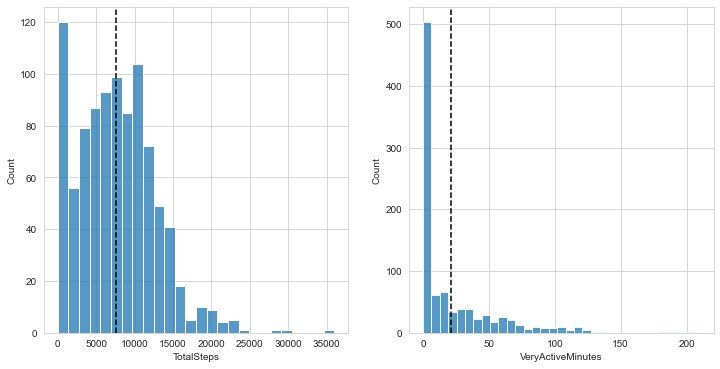

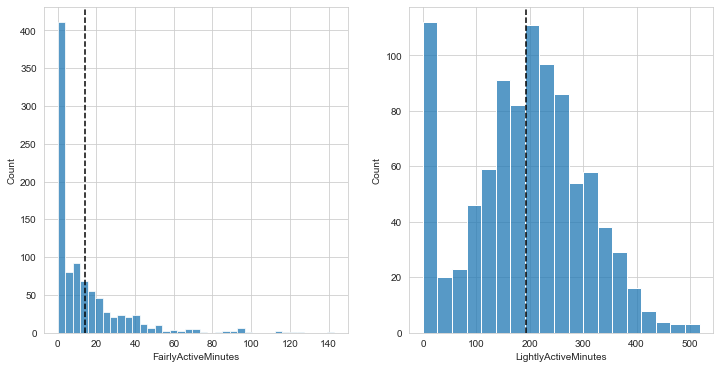

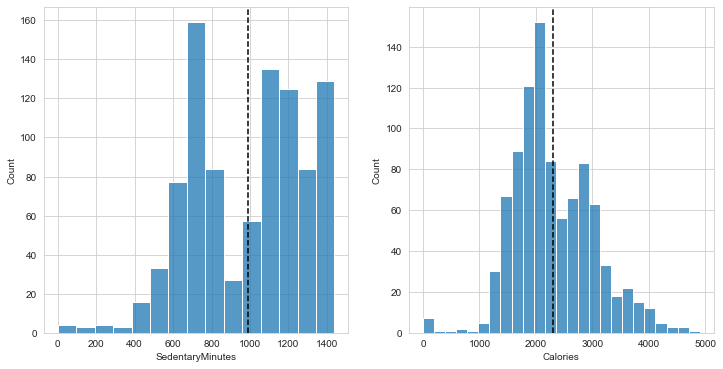

In [28]:
dailyActivity_columns = ['TotalSteps', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']
plot_daily_count(dailyActivity, dailyActivity_columns)

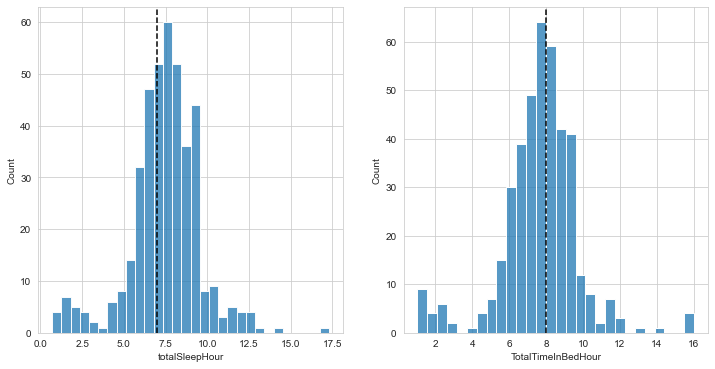

In [29]:
dailySleep_columns = ['totalSleepHour', 'TotalTimeInBedHour']
plot_daily_count(dailySleep, dailySleep_columns)

### Analysis by Weekday

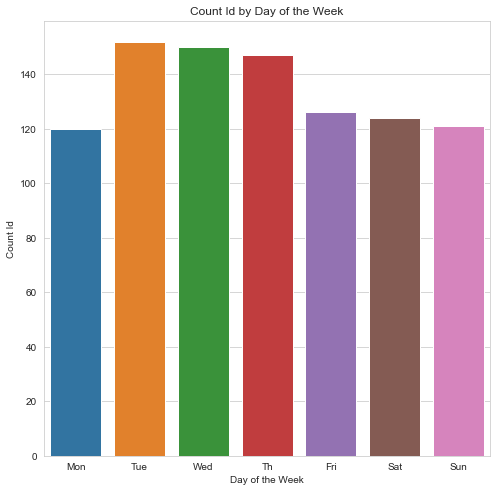

In [30]:
plot_wkDay_stats(dailyActivity, 'Id', 'count')

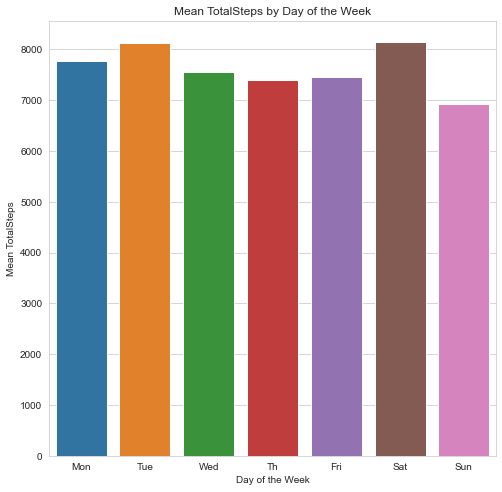

In [31]:
plot_wkDay_stats(dailyActivity, 'TotalSteps', 'mean')

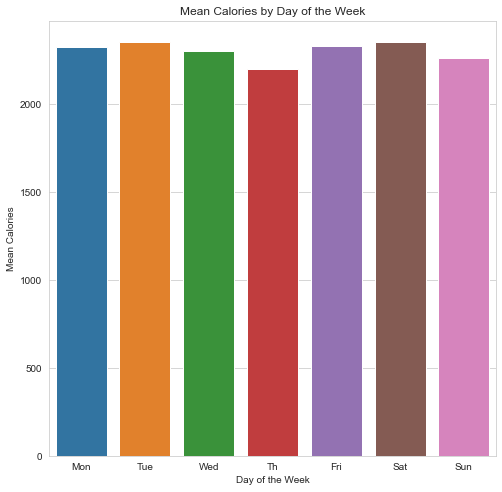

In [32]:
plot_wkDay_stats(dailyActivity, 'Calories', 'mean')

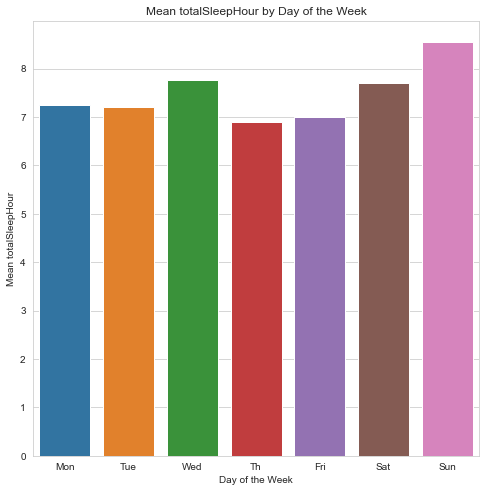

In [33]:
plot_wkDay_stats(dailySleep, 'totalSleepHour', 'mean')

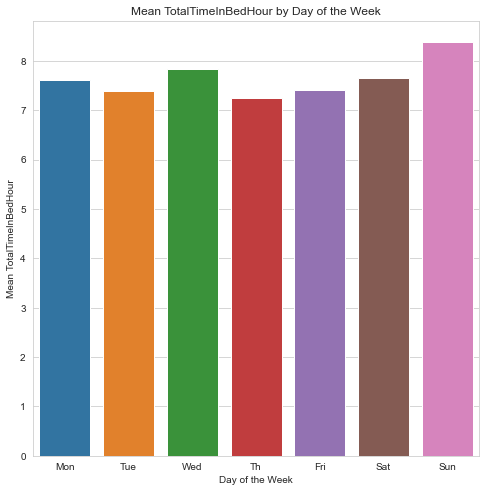

In [34]:
plot_wkDay_stats(dailySleep, 'TotalTimeInBedHour', 'mean')

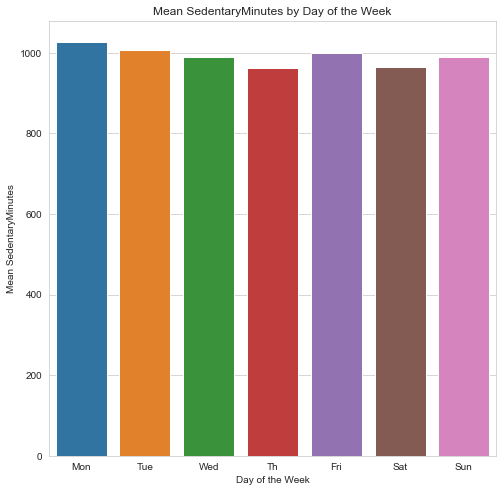

In [35]:
plot_wkDay_stats(dailyActivity, 'SedentaryMinutes', 'mean')

Although there is not that much variance among various features compared to the given day of the week, there are a couple of weekday patterns. For example, more users logged Daily Activity on Tuesday, Wednesday, and Thursday, than the weekend. In addition, more users sleep longer and spend time in bed on Wednesdays and Saturdays over any other day. However, it should be considered that since days cut off 12am – 12pm, how much you sleep in the next day affects your weekday mean.

### Analysis by Hour

#### Mean Heartrate by Hour and Id

In [36]:
heartrate_seconds = pd.read_csv('data_processed/heartrate_seconds_processed.csv')
heartrate_seconds['day_month'] = heartrate_seconds[['month', 'day']].apply(lambda x: '/'.join(x.values.astype(str)), axis="columns")
heartrate_seconds['day_month_hour'] = heartrate_seconds[['day_month', 'hour']].apply(lambda x: ' '.join(x.values.astype(str)), axis="columns")

In [37]:
meanHeartrate_by_hour_query = """SELECT hour, AVG(Value) AS meanHeartrate  
                                 FROM heartrate_seconds_processed  
                                 GROUP BY hour;"""
col_names = ['hour', 'meanHeartrate']
meanHeartrate_by_hour = query_to_df(meanHeartrate_by_hour_query, col_names)
meanHeartrate_by_hour['meanHeartrate'] = meanHeartrate_by_hour['meanHeartrate'].astype('int64')
mean_heartrate = round(heartrate_seconds['Value'].mean())

In [38]:
hourly_meanHeartrate_by_Id_query = """SELECT Id, hour, AVG(Value) AS meanHeartrate  
                                 FROM heartrate_seconds_processed  
                                 GROUP BY Id, hour;"""
col_names = ['Id', 'hour', 'meanHeartrate']
hourly_meanHeartrate_by_Id = query_to_df(hourly_meanHeartrate_by_Id_query, col_names, Id_incl=True)
hourly_meanHeartrate_by_Id['meanHeartrate'] = hourly_meanHeartrate_by_Id['meanHeartrate'].astype('int64')

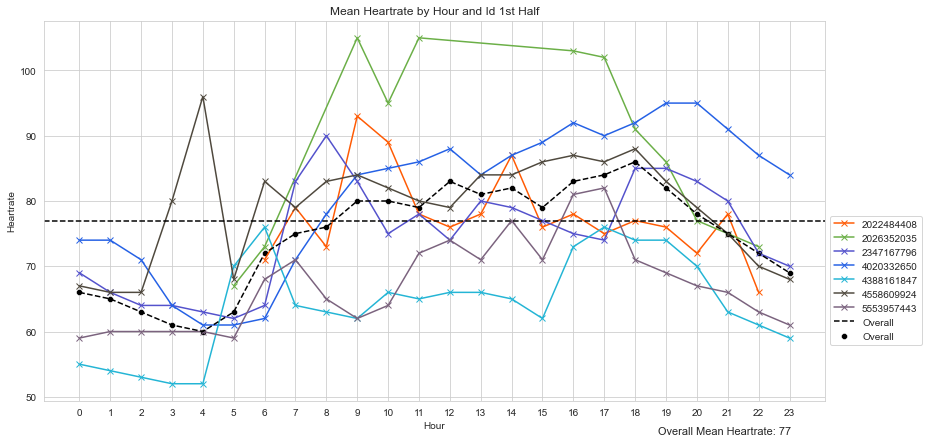

In [57]:
plot_hourly_heartrateById(hourly_meanHeartrate_by_Id, meanHeartrate_by_hour, mean_heartrate, (0,7), 'Mean Heartrate by Hour and Id 1st Half')

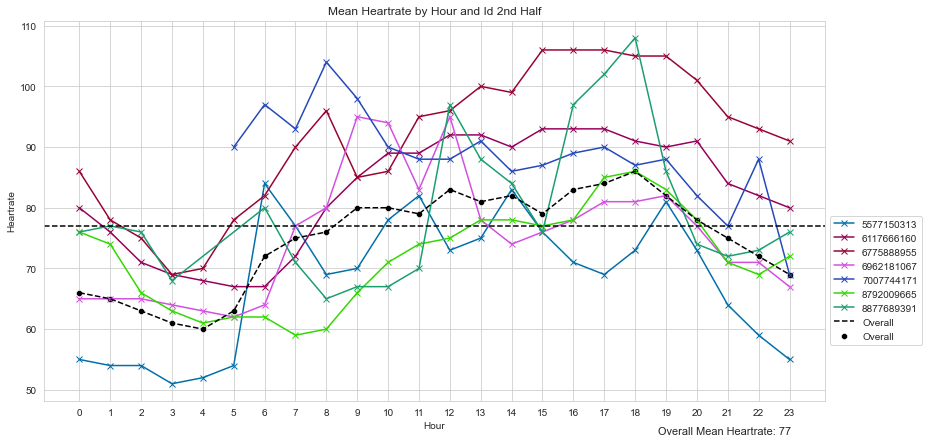

In [58]:
plot_hourly_heartrateById(hourly_meanHeartrate_by_Id, meanHeartrate_by_hour, mean_heartrate, (7, 14), 'Mean Heartrate by Hour and Id 2nd Half')

When analyzing mean heartrate per hour and filtering by Id, each user heart rate peaks at different hours, however when looking at the mean heartrate by hour over the entire dataset (shown in the black articulated dotted line) there is a general pattern of heartrate being the lowest at around 4am and highest between the times of 9am - 6pm. The mean heartrate over all the hours (shown in the black horizontal pointed line) is 77 beats per minute. For visual clarity the data is split into two groups of by Id and each section is graphed above. 

#### Mean Calories by Hour and Id

A very similar pattern emerges when plotting mean calories burnt by hour, which is separated into 3 sections of users, and mean calories per hour overall (shown in the black articulated dotted line). Then mean calories burnt over an hour, spanning the entire dataset (shown in the black horizontal pointed line) is 97 calories.

In [59]:
hourlyCals = pd.read_csv('data_processed/hourlyCalories_processed.csv')
mean_calories = round(hourlyCals['Calories'].mean())

In [60]:
hourlyCalories_query = """SELECT hour, AVG(Calories) AS meanCalories  
                          FROM hourlyCalories_processed  
                          GROUP BY hour;"""
col_names = ['hour', 'meanCalories']
hourlyCalories = query_to_df(hourlyCalories_query, col_names)
hourlyCalories['meanCalories'] = hourlyCalories['meanCalories'].astype('int64')

In [61]:
hourlyCalories_by_Id_query = """SELECT Id, hour, AVG(Calories) AS meanCalories  
                                FROM hourlyCalories_processed  
                                GROUP BY Id, hour;"""
col_names = ['Id', 'hour', 'meanCalories']
hourlyCalories_by_Id = query_to_df(hourlyCalories_by_Id_query, col_names, Id_incl=True)
hourlyCalories_by_Id['meanCalories'] = hourlyCalories_by_Id['meanCalories'].astype('int64')

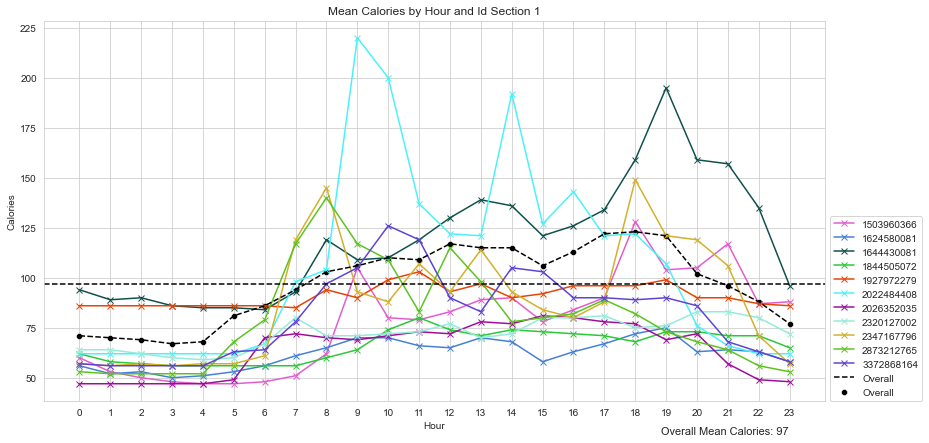

In [62]:
plot_hourly_caloriesById(hourlyCalories_by_Id, hourlyCalories, mean_calories, (0, 11), 'Mean Calories by Hour and Id Section 1')

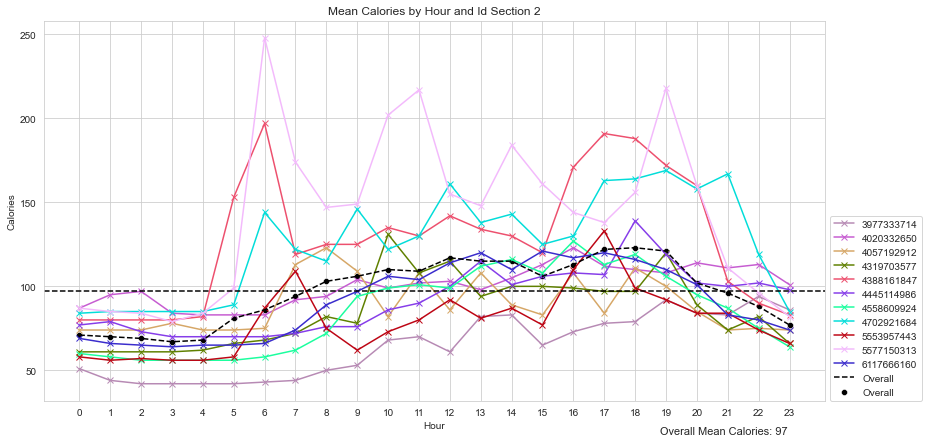

In [63]:
plot_hourly_caloriesById(hourlyCalories_by_Id, hourlyCalories, mean_calories, (11, 22), 'Mean Calories by Hour and Id Section 2')

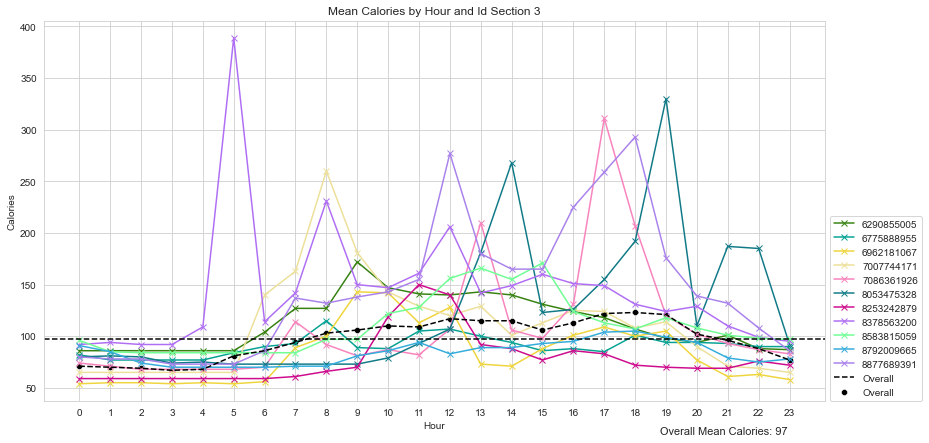

In [64]:
plot_hourly_caloriesById(hourlyCalories_by_Id, hourlyCalories, mean_calories, (22, 33), 'Mean Calories by Hour and Id Section 3')

### Analysis by Participant Id

#### Days Completely Sedentary
Among the total days logged there are a total of 79 days where users were completely sedentary (which is 8.4%). There are certain users who have many completely sedentary days, some going as high as _14 total days_, yet a sizable portion have only a few if any. Of the 33 possible users, 7 of them have more than 4 completely sedentary days  (which is only 21%).

In [65]:
pcnt_sedentary = round(len(dailyActivity[dailyActivity.SedentaryMinutes == 1440])/len(dailyActivity.SedentaryMinutes), 3) * 100
print(f'Percent of days completely sedentary {pcnt_sedentary}')
print(f'{len(dailyActivity[dailyActivity.SedentaryMinutes == 1440])} days completely sedentary')

Percent of days completely sedentary 8.4
79 days completely sedentary


7 users with more than 4 completely sedentary days
21.21 % of total users


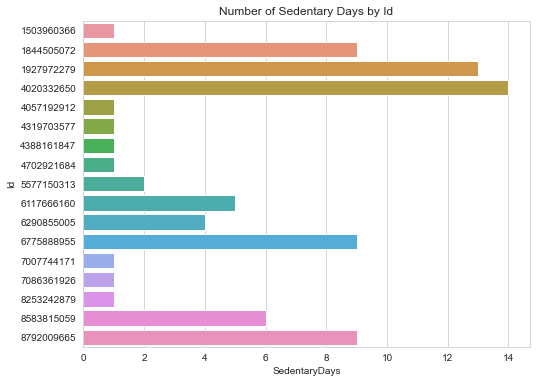

In [66]:
sedentaryDays_query = """SELECT Id, COUNT(SedentaryMinutes) AS SedentaryDays  
                          FROM dailyActivity_processed 
                          WHERE SedentaryMinutes == 1440
                          GROUP BY Id;"""
# call sql_query() and turn into a DataFrame
col_names = ['Id', 'SedentaryDays']
sedentaryDays = query_to_df(sedentaryDays_query, col_names, Id_incl=True)
moreThan_4days = sedentaryDays[sedentaryDays['SedentaryDays'] > 4]
print(len(moreThan_4days), 'users with more than 4 completely sedentary days')
print(round(len(moreThan_4days)/33*100, 2), '% of total users')
plot_query_barplot(sedentaryDays_query, col_names, Id_incl=True, title='Number of Sedentary Days by Id')

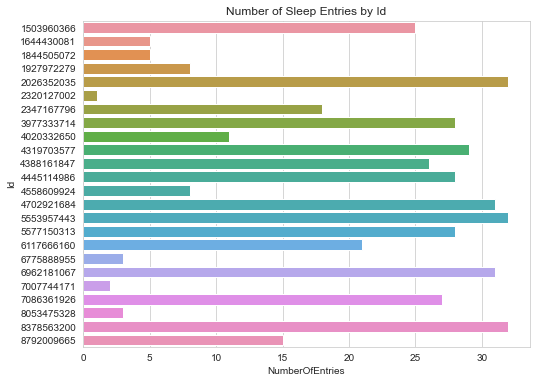

In [67]:
sleepCounts_query = """SELECT Id, COUNT(Id) AS NumberOfEntries
                    FROM dailySleep_generated  
                    GROUP BY Id;"""
col_names = ['Id', 'NumberOfEntries']
plot_query_barplot(sleepCounts_query, col_names, Id_incl=True, title='Number of Sleep Entries by Id')

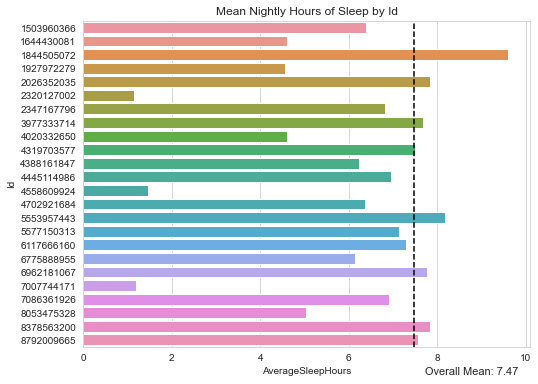

In [68]:
avgSleep_query = """SELECT Id, (AVG(totalSleepMinute) / 60) AS AverageSleepHours  
                    FROM dailySleep_generated  
                    GROUP BY Id;"""
col_names = ['Id', 'AverageSleepHours']
plot_query_barplot(avgSleep_query, col_names, Id_incl=True, mean_line=mean_dict['totalSleepHour'], title='Mean Nightly Hours of Sleep by Id')

Over all users, they on average get roughly 7.5 hours a night of sleep. There is a large variance of mean hours of sleep among users, some apparently getting as little as a couple of hours a night while others as many as 9 hours. One thing to note however is that some users only logged a few entries, which makes the conclusion flawed.

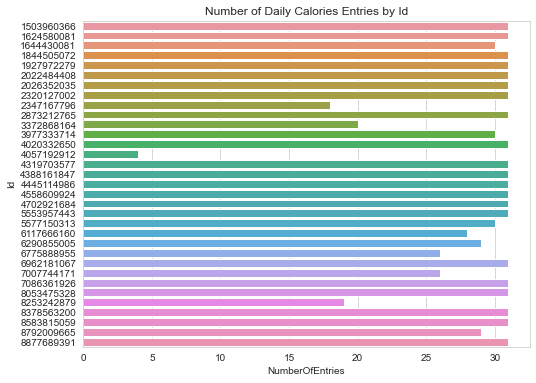

In [69]:
caloriesCounts_query = """SELECT Id, COUNT(Calories) AS NumberOfEntries
                          FROM dailyActivity_processed  
                          GROUP BY Id;"""
col_names = ['Id', 'NumberOfEntries']
plot_query_barplot(caloriesCounts_query, col_names, Id_incl=True, title='Number of Daily Calories Entries by Id')

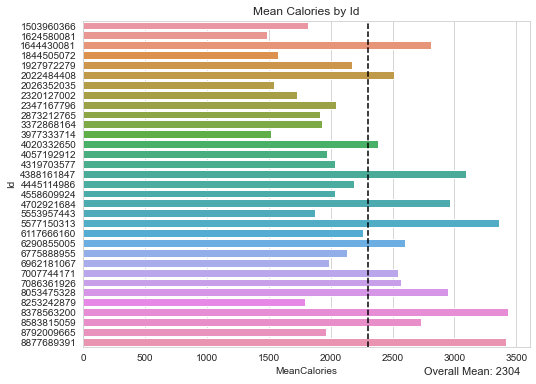

In [70]:
meanCalories_query = """SELECT Id, AVG(Calories) AS AverageCalories  
                       FROM dailyActivity_processed  
                       GROUP BY Id;"""
col_names = ['Id', 'MeanCalories']
plot_query_barplot(meanCalories_query, col_names, Id_incl=True, mean_line=mean_dict['Calories'], title='Mean Calories by Id')

Over all users, they on average burn 2304 calories a day. There are more entries logged for each Id over this portion of the data than the nightly hours of sleep, making this statistic more reliable. 

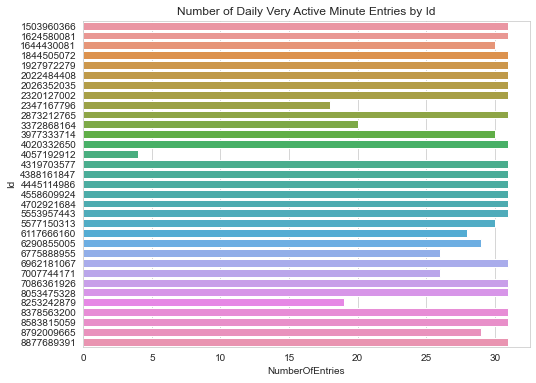

In [71]:
activeMinuteCounts_query = """SELECT Id, COUNT(VeryActiveMinutes) AS NumberOfEntries
                              FROM dailyActivity_processed  
                              GROUP BY Id;"""
col_names = ['Id', 'NumberOfEntries']
plot_query_barplot(activeMinuteCounts_query, col_names, Id_incl=True, title='Number of Daily Very Active Minute Entries by Id')

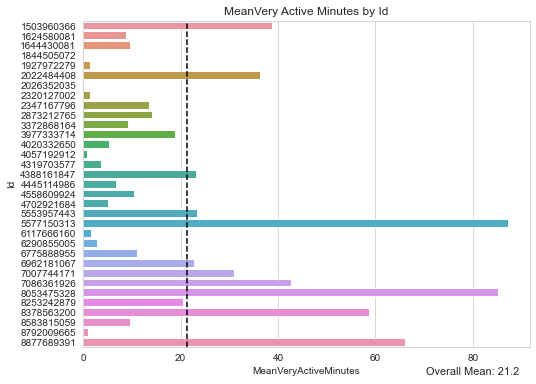

In [72]:
meanVeryActiveMinutes_query = """SELECT Id, AVG(VeryActiveMinutes) AS MeanVeryActiveMinutes    
                                 FROM dailyActivity_processed
                                 GROUP BY Id;"""
col_names = ['Id', 'MeanVeryActiveMinutes']
plot_query_barplot(meanVeryActiveMinutes_query, col_names, Id_incl=True, mean_line=mean_dict['VeryActiveMinutes'], title='MeanVery Active Minutes by Id')

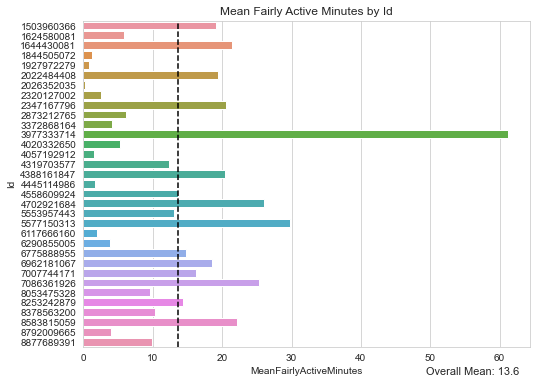

In [73]:
meanFairlyActiveMinutes_query = """SELECT Id, (AVG(FairlyActiveMinutes)) AS MeanFairlyActiveMinutes    
                                   FROM dailyActivity_processed
                                   GROUP BY Id;"""
col_names = ['Id', 'MeanFairlyActiveMinutes']
plot_query_barplot(meanFairlyActiveMinutes_query, col_names, Id_incl=True, mean_line=mean_dict['FairlyActiveMinutes'], title='Mean Fairly Active Minutes by Id')

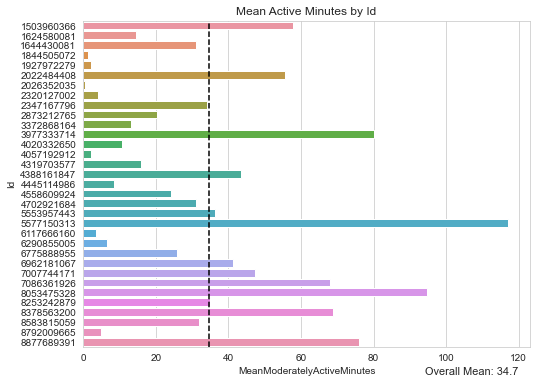

In [74]:
meanActiveMinutes_Id_query = """SELECT Id, AVG(FairlyActiveMinutes + VeryActiveMinutes) AS MeanModeratelyActiveMinutes    
                                   FROM dailyActivity_processed
                                   GROUP BY Id;"""
col_names = ['Id', 'MeanModeratelyActiveMinutes']
mean_activeMinutes = round(dailyActivity['ModeratelyActiveMinutes'].mean(), 1)
plot_query_barplot(meanActiveMinutes_Id_query, col_names, Id_incl=True, mean_line=mean_activeMinutes, title='Mean Active Minutes by Id')

Over all users, they on average perform roughly 21 minutes of `VeryActiveMinutes` a day, yet there is huge variance among users. A similar situation occurs for mean `FairlyActiveMinutes`, with an average of 13 minutes a day. Finally, when the features are combined into simply `ModeratelyActiveMinutes`  the average value not surprisingly increased to 34 minutes, just like with other features there is a large variance among all the users, some being moderately to very active for over an hour a day, while others with virtually no minutes in that range a day. 

### Resting Heartrate Analysis
Resting heartrate was calculated two ways, one being heartrate when no steps are occurring (`steps == 0`), while the other way it is calculated is by a low enough MET for a given time period, implying not that much activity is occurring (`hourlyMETs < 660` implying less that 11 per minute).

In [75]:
# Mean Resting Heartrate
meanRestingHeartrate_query = """SELECT AVG(h.mean) AS meanRestingHeartrate  
                                FROM minuteHeartrate_generated h  
                                JOIN minuteStepsNarrow_processed st ON st.Id = h.Id AND st.dtString = h.dtString  
                                WHERE st.Steps = 0;"""
meanRestingHeartrate = round(simple_sql_query(meanRestingHeartrate_query))
print('Mean Resting Heartrate Overall:',meanRestingHeartrate)

Mean Resting Heartrate Overall: 68


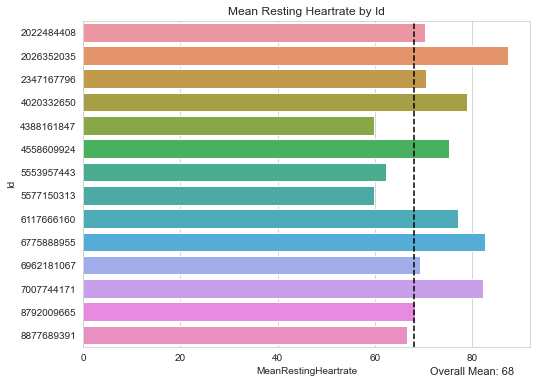

In [76]:
meanRestingHeartrate_Id_query = """SELECT h.Id, AVG(h.mean) AS meanRestingHeartrate
                                   FROM minuteHeartrate_generated h  
                                   JOIN minuteStepsNarrow_processed st ON st.Id = h.Id AND st.dtString = h.dtString  
                                   WHERE st.Steps = 0  
                                   GROUP BY h.Id;"""
col_names = ['Id', 'MeanRestingHeartrate']
plot_query_barplot(meanRestingHeartrate_Id_query, col_names, Id_incl=True, mean_line=meanRestingHeartrate, title='Mean Resting Heartrate by Id')

In [77]:
meanRestingHeartrate_Id = query_to_df(meanRestingHeartrate_Id_query, col_names, Id_incl=True)
meanRestingHeartrate_Id.agg({'MeanRestingHeartrate': ['min', 'max']}).apply(lambda x: round(x))

,MeanRestingHeartrate
min,60.0
max,88.0


Mean resting heartrate (calculated when `steps == 0`), just like other features varies by user (ranging from roughly 60bmp to 88bpm, the mean resting heartrate being 68bpm.

In [78]:
meanRestingCalories_query = """SELECT AVG(c.Calories) AS meanRestingCalories  
                               FROM hourlyCalories_processed c  
                               JOIN hourlySteps_processed st ON st.Id = c.Id AND st.dtString = c.dtString   
                               WHERE st.StepTotal = 0;"""
meanRestingCalories = round(simple_sql_query(meanRestingCalories_query))
meanRestingCalories

70

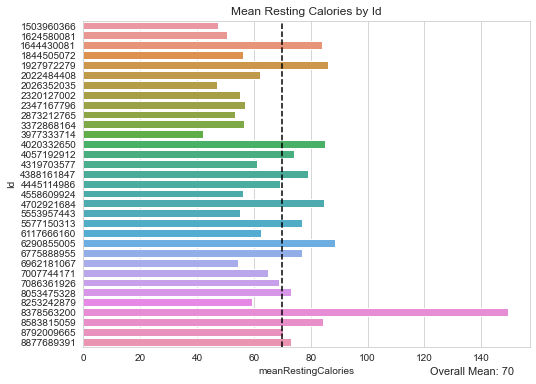

In [79]:
restingCalories_by_Id_query = """SELECT c.Id, AVG(c.Calories) AS meanRestingCalories  
                                 FROM hourlyCalories_processed c  
                                 JOIN hourlySteps_processed st ON st.Id = c.Id AND st.dtString = c.dtString    
                                 WHERE st.StepTotal = 0  
                                 GROUP BY c.Id;"""
col_names = ['Id', 'meanRestingCalories']
restingCalories_by_Id = query_to_df(restingCalories_by_Id_query, col_names, Id_incl=True)
restingCalories_by_Id['meanRestingCalories'] = restingCalories_by_Id['meanRestingCalories'].astype('int64')
plot_query_barplot2(restingCalories_by_Id_query, col_names, Id_incl=True, mean_line=meanRestingCalories, title='Mean Resting Calories by Id')

There is a much larger variance in mean calories burnt when resting, this implies there are large differences in metabolic rate among users. The mean resting calories being 70 calories an hour, when taking no steps.

In [80]:
# Mean Resting Heartrate via METs
meanRestingHeartrateMETs_query = """SELECT AVG(h.mean) AS meanRestingHeartrate  
                                    FROM hourlyHeartrate_generated h  
                                    JOIN hourlyMETs_generated m ON m.Id = h.Id AND m.dtString = h.dtString 
                                    WHERE m.METS < 660;"""
meanRestingHeartrateMETs = round(simple_sql_query(meanRestingHeartrate_query))
print('Mean Resting Heartrate Overall:',meanRestingHeartrate)

Mean Resting Heartrate Overall: 68


In [81]:
meanRestingHeartrateMETs_Id_query = """SELECT h.Id, AVG(h.mean) AS meanRestingHeartrate
                                       FROM hourlyHeartrate_generated h  
                                       JOIN hourlyMETs_generated m ON m.Id = h.Id AND m.dtString = h.dtString  
                                       WHERE m.METS < 660
                                       GROUP BY h.Id;"""
col_names = ['Id', 'MeanRestingHeartrate']
meanRestingHeartrateMETs_Id = query_to_df(meanRestingHeartrateMETs_Id_query, col_names, Id_incl=True)
meanRestingHeartrateMETs_Id.agg({'MeanRestingHeartrate': ['min', 'max']}).apply(lambda x: round(x))

,MeanRestingHeartrate
min,53.0
max,79.0


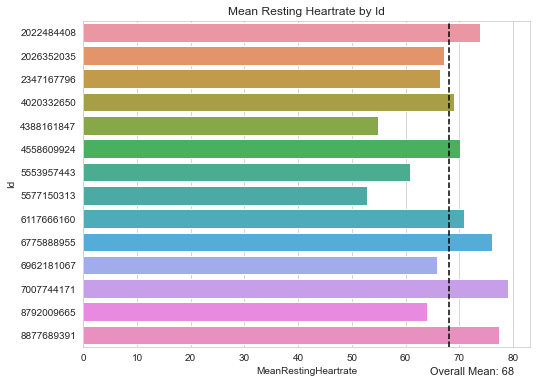

In [82]:
col_names = ['Id', 'MeanRestingHeartrate']
plot_query_barplot(meanRestingHeartrateMETs_Id_query, col_names, Id_incl=True, mean_line=meanRestingHeartrateMETs, title='Mean Resting Heartrate by Id')

Mean resting heartrate (when calculated with `hourlyMETs < 660`) are similar yet there are differences between the two when comparing the two values calculated per user, there is the same mean resting heartrate, which gives more credence to it being an accurate reflection of the population.

In [83]:
# Mean Resting Heartrate via METs
meanRestingCalories_METs_query = """SELECT AVG(c.Calories) AS MeanRestingCalories  
                                    FROM hourlyCalories_processed c
                                    JOIN hourlyMETs_generated m ON m.Id = c.Id AND m.dtString = c.dtString 
                                    WHERE m.METS < 660;"""
meanRestingCalories_METs = round(simple_sql_query(meanRestingCalories_METs_query))
print('Mean Resting Calories Overall:', meanRestingCalories_METs )

Mean Resting Calories Overall: 68


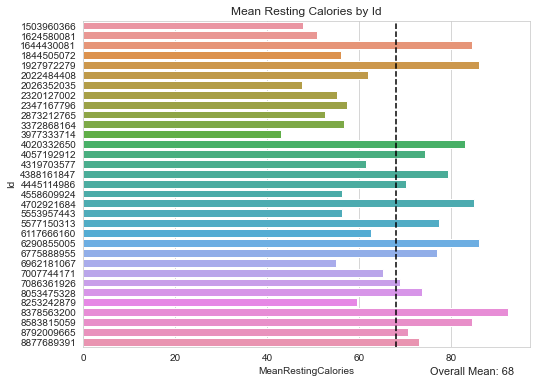

In [84]:
meanRestingCalories_METs_Id_query = """SELECT c.Id, AVG(c.Calories) AS meanRestingCalories  
                                       FROM hourlyCalories_processed c
                                       JOIN hourlyMETs_generated m ON m.Id = c.Id AND m.dtString = c.dtString 
                                       WHERE m.METS < 660
                                       GROUP BY c.Id;"""
col_names = ['Id', 'MeanRestingCalories']
plot_query_barplot(meanRestingCalories_METs_Id_query, col_names, Id_incl=True, mean_line=meanRestingCalories_METs, title='Mean Resting Calories by Id')

Aside from a couple of users mean resting calories (when calculated with `hourlyMETs < 660`) are very similar to the statistics calculated with steps, yet the overall mean is 68 calories burnt an hour, 2 calories less. 

### Linear Relationships
There is a strong positive correlation between daily `VeryActiveMinutes` and daily `Calories` (Pearson R-score of 0.61 and an R-squared of 0.379). This implies that the more very active minutes a user has a day, the more calories burnt, which makes intuitive sense. Every minute of high activity, 13 extra calories are burnt, given that the average amount of calories burnt daily are around 2300, and the intercept calculated is 2018, this seems to make sense.

#### Very Active Minutes vs Calories

Slope: 13.465589546674831
Intercept: 2018.6118042222386
Pearson R-score: 0.6158382682703385
P-value: 3.1712210634555086e-99
Standard Error: 0.5624880178752508
R-squared: 0.3792567726662086


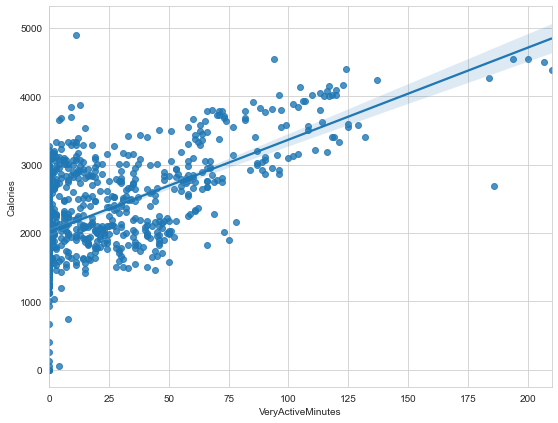

In [85]:
VeryActiveMinutes_v_Calories = calc_linear_regression(dailyActivity['VeryActiveMinutes'], dailyActivity['Calories'])

#### Fairly Active Minutes vs Calories

Slope: 10.693900658375227
Intercept: 2158.5479496862313
Pearson R-score: 0.29762346826512115
P-value: 1.1104213678518294e-20
Standard Error: 1.120022880258734
R-squared: 0.08857972886215992


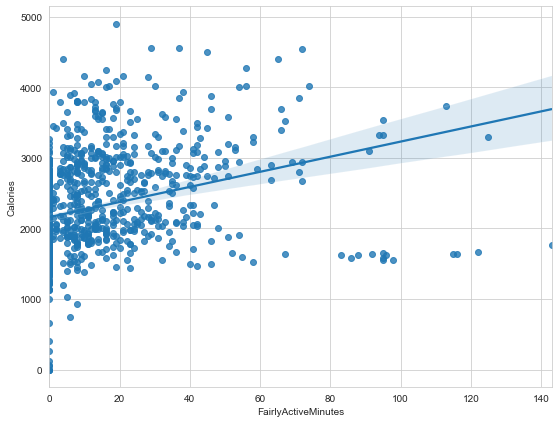

In [86]:
FairlyActiveMinutes_v_Calories = calc_linear_regression(dailyActivity['FairlyActiveMinutes'], dailyActivity['Calories'])

#### Lightly Active Minutes vs Calories

Slope: 1.886069136832968
Intercept: 1939.9513674083464
Pearson R-score: 0.28671753401754857
P-value: 3.02378518780819e-19
Standard Error: 0.2057663340340949
R-squared: 0.08220694431310416


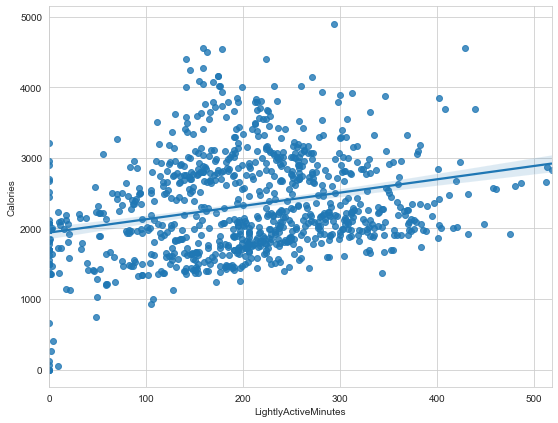

In [87]:
LightlyActiveMinutes_v_Calories = calc_linear_regression(dailyActivity['LightlyActiveMinutes'], dailyActivity['Calories'])

#### Moderately Active Minutes Vs Calories

Slope: 9.95438343193657
Intercept: 1957.8959558308497
Pearson R-score: 0.602343936163546
P-value: 6.832538881488755e-94
Standard Error: 0.43072499906977585
R-squared: 0.36281821743299325


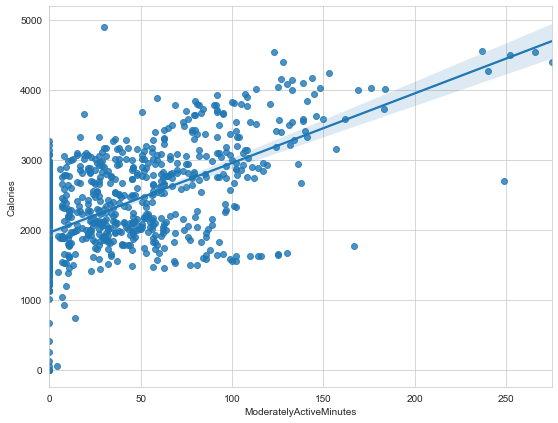

In [88]:
ModeratelyActiveMinutes_v_Calories = calc_linear_regression(dailyActivity['ModeratelyActiveMinutes'], dailyActivity['Calories'])

#### Active Minutes Vs Calories

Slope: 2.783570511200618
Intercept: 1670.2288333609572
Pearson R-score: 0.47199746253681873
P-value: 2.540307872379166e-53
Standard Error: 0.16975894964286808
R-squared: 0.22278160464119523


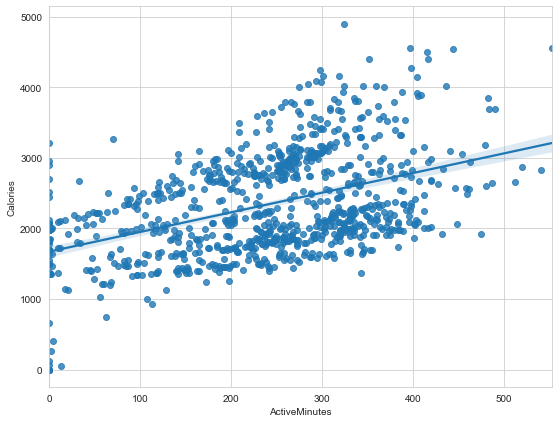

In [89]:
ActiveMinutes_v_Calories = calc_linear_regression(dailyActivity['ActiveMinutes'], dailyActivity['Calories'])

#### Sedentary Minutes Vs Calories

Slope: -0.25500432042659527
Intercept: 2556.372569686846
Pearson R-score: -0.10697304768018762
P-value: 0.001020558401566275
Standard Error: 0.07738781004111263
R-squared: 0.011443232929987612


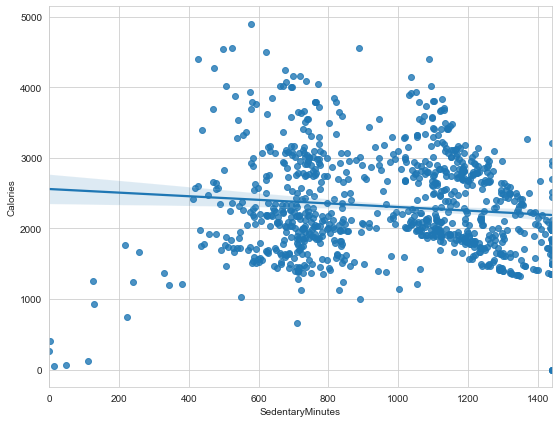

In [90]:
SedenratyMinutes_v_Calories = calc_linear_regression(dailyActivity['SedentaryMinutes'], dailyActivity['Calories'])

#### Total Steps Vs Calories
Another strong positive correlation is between `TotalSteps` and daily `Calories` (Pearson R-score of 0.59 and an R-squared of 0.349). The estimated slope implies 0.083 calories burnt per step.

Slope: 0.08351327055253457
Intercept: 1665.7426768758328
Pearson R-score: 0.5915680862453355
P-value: 8.203860328508778e-90
Standard Error: 0.003716394269129904
R-squared: 0.34995280066396883


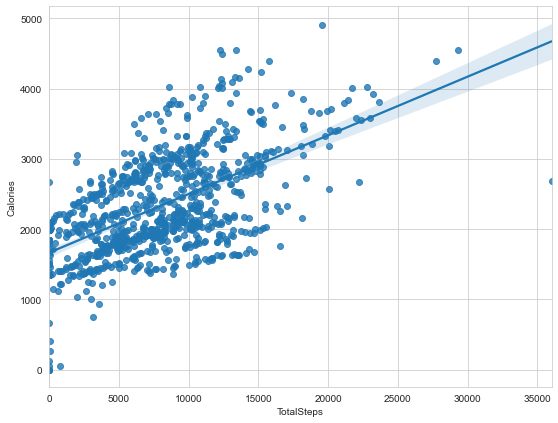

In [91]:
TotalSteps_v_Calories = calc_linear_regression(dailyActivity['TotalSteps'], dailyActivity['Calories'])

#### Total Distance Vs Calories
An even stronger positive correlation related to `TotalSteps` and `Calories` is between `TotalDistance` and daily `Calories` (Pearson R-score of 0.64 and an R-squared of 0.415). The estimated slope implies 118 calories burnt per kilometer traveled (assuming on foot, especially since .98 correlation between `TotalSteps` and `TotalDistance`).

Slope: 118.02210357000958
Intercept: 1655.7033820668826
Pearson R-score: 0.6449618736830635
P-value: 1.1523955880258875e-111
Standard Error: 4.566077768932748
R-squared: 0.4159758185047684


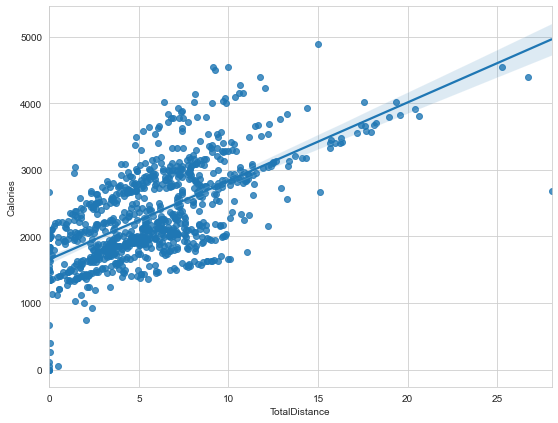

In [92]:
TotalDistance_v_Calories = calc_linear_regression(dailyActivity['TotalDistance'], dailyActivity['Calories'])

Slope: 0.0007601867098384872
Intercept: -0.31653603625262416
Pearson R-score: 0.9853688433601107
P-value: 0.0
Standard Error: 4.293188510283074e-06
R-squared: 0.970951757464844


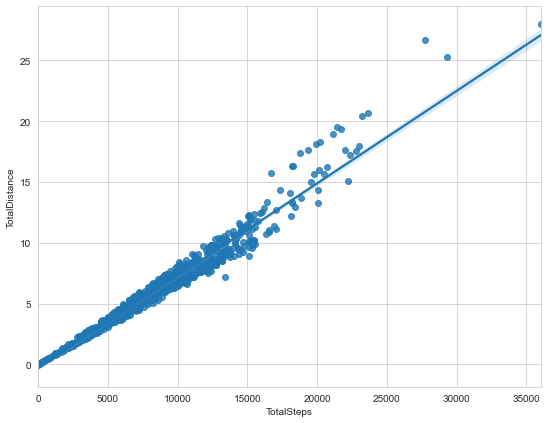

In [93]:
TotalSteps_v_TotalDistance = calc_linear_regression(dailyActivity['TotalSteps'], dailyActivity['TotalDistance'])

#### Total Time in Bed vs Total Sleep Minutes

Slope: 0.8769199448032284
Intercept: 46.40327467263103
Pearson R-score: 0.886351792963975
P-value: 1.622728320435265e-138
Standard Error: 0.02267860712824545
R-squared: 0.7856195008904525


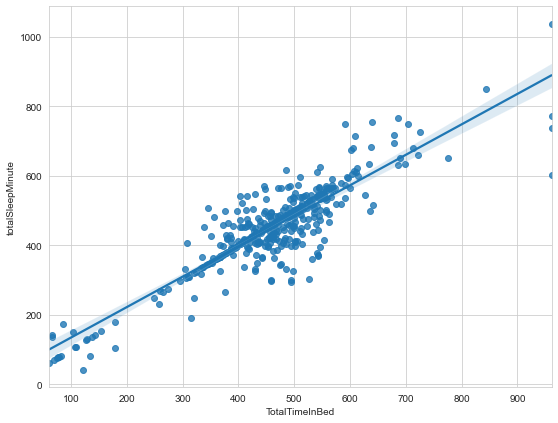

In [94]:
TotalTimeInBed_v_totalSleepMinute = calc_linear_regression(dailySleep['TotalTimeInBed'], dailySleep['totalSleepMinute'])

#### Very Active Minutes vs Total Sleep Minutes

Slope: -0.3543915742475321
Intercept: 457.33230994133635
Pearson R-score: -0.10178868851984468
P-value: 0.0393866111060174
Standard Error: 0.17147160076558698
R-squared: 0.01036093711058983


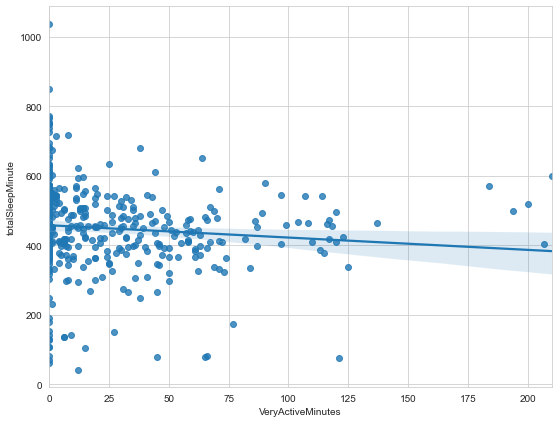

In [95]:
VeryActiveMinutes_v_totalSleepMinute = calc_linear_regression(dailySleep['VeryActiveMinutes'], dailySleep['totalSleepMinute'])

#### Sedentary Minutes vs Total Sleep Minutes
There is a strong negative correlation between `SedentaryMinutes` and `totalSleepMinute` (Pearson R-score of -0.63 and an R-squared of 0.406). The estimated slope of -0.483 implies that for every 2 minutes spent sedentary that user will sleep roughly 1 minute less that night.

Slope: -0.48368363079398224
Intercept: 792.8872110493703
Pearson R-score: -0.6374225015017625
P-value: 3.9532028363853935e-48
Standard Error: 0.028945744163413292
R-squared: 0.40630744542076447


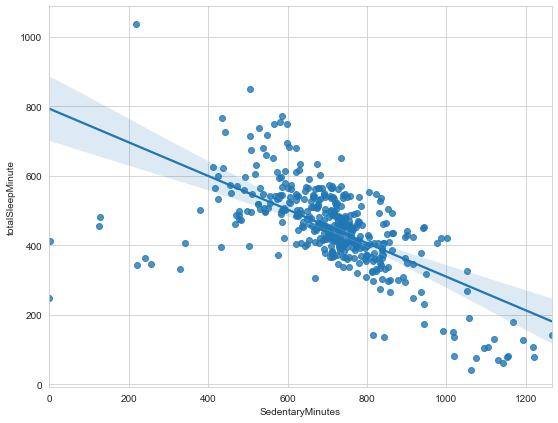

In [96]:
Sedentary_v_totalSleepMinute = calc_linear_regression(dailySleep['SedentaryMinutes'], dailySleep['totalSleepMinute'])

#### Very Active Minutes vs Sleep Ratio

Slope: -0.0001297137794019097
Intercept: 1.0934728177797135
Pearson R-score: -0.051727117554591986
P-value: 0.29607095471220995
Standard Error: 0.00012398123408761402
R-squared: 0.002675694690506547


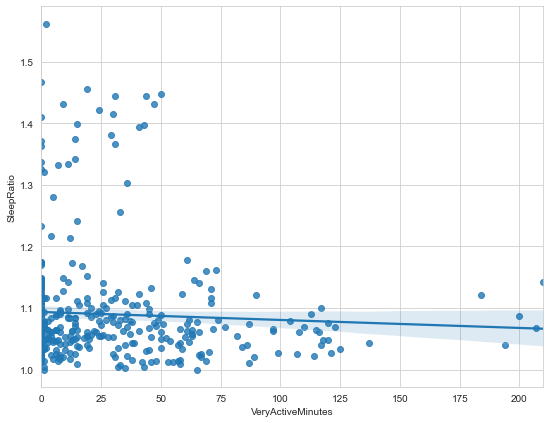

In [97]:
VeryActiveMinutes_v_SleepRatio = calc_linear_regression(dailySleep['VeryActiveMinutes'], dailySleep['SleepRatio'])

#### Fairly Active Minutes vs Sleep Ratio

Slope: 0.001771641610093815
Intercept: 1.0584683665766461
Pearson R-score: 0.43730966480724753
P-value: 1.4009548592351932e-20
Standard Error: 0.000180370959496255
R-squared: 0.19123974293382706


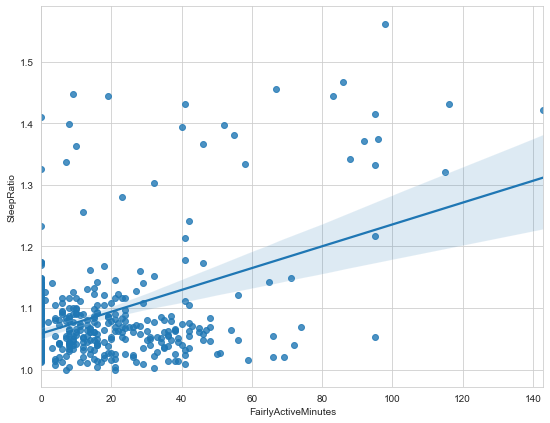

In [98]:
FairlyActiveMinutes_v_SleepRatio = calc_linear_regression(dailySleep['FairlyActiveMinutes'], dailySleep['SleepRatio'])

#### Lightly Active Minutes vs SleepRatio

Slope: -0.00012356630942085905
Intercept: 1.1169811916390415
Pearson R-score: -0.11796429421115985
P-value: 0.016864370863904774
Standard Error: 5.149635265316454e-05
R-squared: 0.013915574708736944


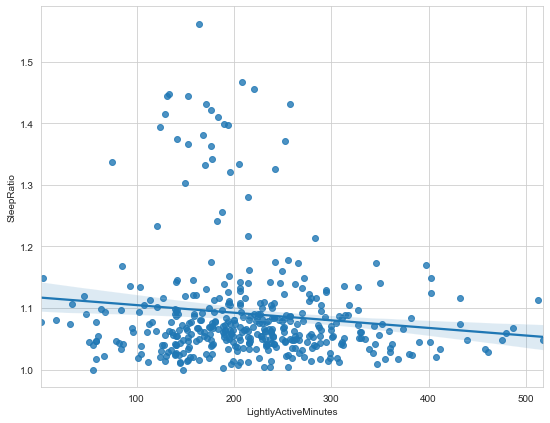

In [99]:
LightlyActiveMinutes_v_SleepRatio = calc_linear_regression(dailySleep['LightlyActiveMinutes'], dailySleep['SleepRatio'])

#### Sedentary Minutes vs Sleep Ratio

Slope: -1.1229146833971655e-05
Intercept: 1.0982202376287744
Pearson R-score: -0.02054607151231474
P-value: 0.6782884115464065
Standard Error: 2.7051801856076295e-05
R-squared: 0.00042214105458926454


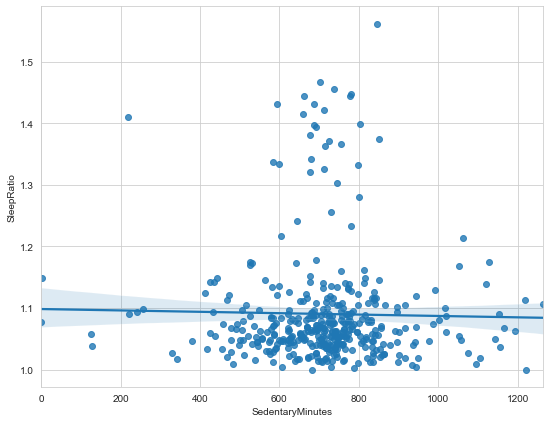

In [100]:
SedentaryMinutes_v_SleepRatio = calc_linear_regression(dailySleep['SedentaryMinutes'], dailySleep['SleepRatio'])

#### Resting Heartrate vs Calories
As mentioned about resting Heartrate was calculated two different ways, the first using hourlySteps and the second using hourlyMETs.

In [101]:
### Resting Heartrate by Steps
restingHeartrate_Id_viaSteps_query = """SELECT h.Id, h.month, h.day, AVG(h.mean) AS meanRestingHeartrate
                                        FROM hourlyHeartrate_generated h
                                        JOIN hourlySteps_processed st ON st.Id = h.Id AND st.dtString = h.dtString
                                        WHERE st.StepTotal = 0
                                        GROUP BY h.Id, h.month, h.day;"""
col_names = ['Id', 'month', 'day', 'meanRestingHeartrate']
restingHeartrate_Id_viaSteps = query_to_df(restingHeartrate_Id_viaSteps_query, col_names, Id_incl=True)
restingHeartrate_Id_viaSteps['Id_month_day'] = restingHeartrate_Id_viaSteps[['Id', 'month', 'day']].apply(lambda x: ' '.join(x.values.astype(str)), axis="columns")

In [102]:
### Resting Heartrate by METs
restingHeartrateviaMETs_Id_query = """SELECT h.Id, h.month, h.day, AVG(h.mean) AS meanRestingHeartrate
                                      FROM hourlyHeartrate_generated h  
JOIN hourlyMETs_generated m ON m.Id = h.Id AND m.dtString = h.dtString 
WHERE m.METS < 660
GROUP BY h.Id, h.month, h.day;"""
col_names = ['Id', 'month', 'day', 'meanRestingHeartrate']
restingHeartrateviaMETs_Id = query_to_df(restingHeartrateviaMETs_Id_query, col_names, Id_incl=True)
restingHeartrateviaMETs_Id['Id_month_day'] = restingHeartrateviaMETs_Id[['Id', 'month', 'day']].apply(lambda x: ' '.join(x.values.astype(str)), axis="columns")

In [103]:
restingHeartrate_comparison = restingHeartrate_Id_viaSteps.merge(restingHeartrateviaMETs_Id, on='Id_month_day', how='inner', suffixes=['_bySteps', '_byMETs'])
dailyStatistics['Id_month_day'] = dailyStatistics[['Id', 'month', 'day']].apply(lambda x: ' '.join(x.values.astype(str)), axis="columns")
dailyStats_resting = dailyStatistics.merge(restingHeartrate_comparison, on='Id_month_day', how='inner', suffixes=['_dataset2', '_resting'])

Slope: -44.892662481114705
Intercept: 5275.23671417207
Pearson R-score: -0.4388501592621009
P-value: 1.3849799255840796e-09
Standard Error: 7.008774480372944
R-squared: 0.19258946228437135


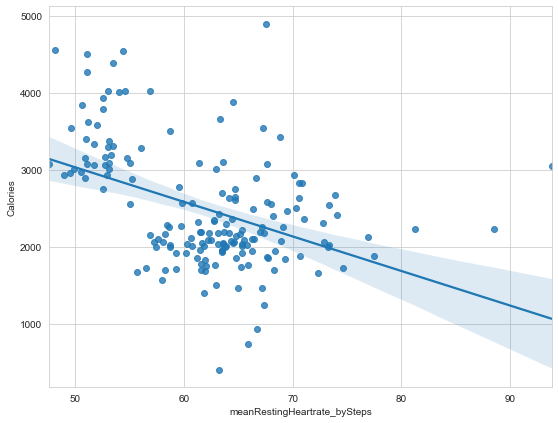

In [104]:
restingHeartrateSteps_v_Calories = calc_linear_regression(dailyStats_resting['meanRestingHeartrate_bySteps'], dailyStats_resting['Calories'])

Slope: -55.47788188704966
Intercept: 5931.547112452301
Pearson R-score: -0.5120436785391254
P-value: 5.137701718460331e-13
Standard Error: 7.096125406911557
R-squared: 0.26218872873187904


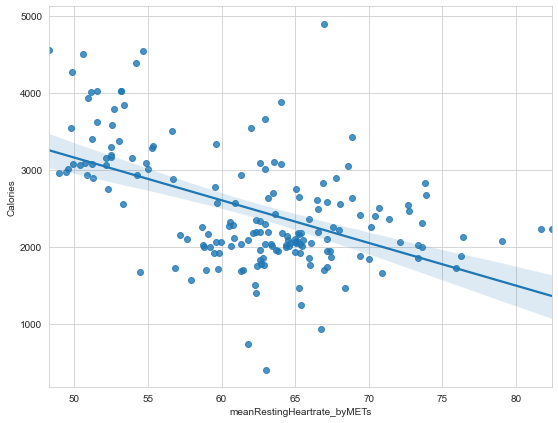

In [105]:
restingHeartrateMETs_v_Calories = calc_linear_regression(dailyStats_resting['meanRestingHeartrate_byMETs'], dailyStats_resting['Calories'])

There is a moderate negative correlation between calories burnt daily and mean resting heartrate based on both measures. When comparing linearity using `hourlySteps = 0` the Pearson R-score is -0.438 with a p-value of 1.38 e-09 making it statistically significant. Mean resting heartrate calculated via `hourlyMETs<660` has a Pearson R-score of -0.512 with a p-value of 5.13e-13.  

## Linear Regression to Estimate Calories

Given daily statistics such as daily minutes of activity at various levels, daily minutes asleep, and resting heartrate it’s possible to estimate with reasonable accuracy how many calories will be burnt that day. Calorie prediction was tested using 3 different datasets with various features included. In addition, a feature selection test was conducted using XGBoost to determine the features with the most explanatory capabilities. Tests were conducted both with and without the use of the day of the week as categorical dummy variables. A comprehensive account of the datasets, the tests conducted, and their results can be found in the Jupyter Notebook file `testingCaloriePredictionModel.ipynb`. 

Dataset 1 consists of a copy of `dailyActivity.csv`, minus the non-quantitative features, such as Id and month and weekday (depending on the given linear regression test). Additional features were created such as weighted versions of very, fairly, light and sedentary activity minutes, as well as those weighted versions combined into standalone indices called `ModeratelyActiveMinutes`, `ActiveMinutes` (not weighted),  `weightedModerateActivity_combined`, and `weightedActivity_combined`. These proved to contribute more towards accurate predictions of daily calories. Dataset 2 builds on top of dataset 1, but includes sleep features such as `TotalTimeInBedHour`, `totalSleepHour`, `totalSleepQuality`, and `SleepRatio` (the ratio between how much time asleep and total sleep quality). Dataset 3 builds on top of dataset 1 and 2, by including the mean resting heartrate, calculated both ways (using METs and Steps).  

After reviewing the results of the tests conducted, analysis suggests that all available quantitative features should be included for estimating calories burnt using linear regression, excluding dummy variables for day of the week. Dataset 1 which is derived entirely from the Daily Activity table had an R^2 score range from .677 to .758 and RSME (root squared mean error) ranging from 317 to 363. Dataset 2 built on top of Dataset 1, also included daily sleep data from users. Results from testing Dataset 2 found an increase in performance with the R^2 score ranging from .798 to .852 and RSME ranging from 272 to 329. Although there was a performance increase from Dataset 1 to Dataset 2, there are less observations in Dataset 2 (940 observations vs 410), which decreases the veracity of the results. Dataset 3 builds on both Dataset 1 and Dataset 2, but includes resting heartrate calculated two ways; the first being from filtering average heartrate per hour when 0 steps were taken and the second being generated by filtering average heartrate per hour when total METS for that hour are less than 660. For Dataset 3 the R^2 scores range from .852 to .926 and RSME ranges from 235 to 280. Dataset 3 has the best results; however, it contains only 174 observations which puts into question how well it would perform with more observations to train and test on. Further research is recommended to better understand how useful the additional features are in estimating Calories burnt on a given day based on the activity and sleep choices made for that user.  

There was a huge drop off in performance when filtering features using XGboost, which suggests that it is better to use all the available features when conducting the linear regression estimate. In addition, the inclusion of day of the week dummy variables yielded similar results for each dataset compared to not included day of week dummy variables. Thus, it is recommended not to include them in the calorie estimation model as to keep the model more general and reduce unnecessary features. 

# Recommendations

The purpose of the analysis conducted here is to use smart device fitness data to generate new growth opportunities for the company. This is done by finding how consumers are using their smart devices and discovering trends in the fitness data among the users. After reviewing the analytic findings there are a few recommendations that have the potential to accomplish the business goal.  

First, when comparing the unique user Id’s included in each data table, users log some things more consistently than others. For example, tables such as dailyActivity and hourlyCalories (to name only a few), all of the participating users had data logged (33 unique Id’s in total). Tables related to sleep had only 24 participants with data logged, while tables such as weightLog has only 8 participants included. One solution would be to remind and encourage users to log all the available data points, as to get as comprehensive and wholistic view of the user’s health habits as possible.  

Secondly, as seen in the analysis by hour section of this report, each user has peak heartrate and peak calories burnt at different times (with lots of fluctuations). There is a general trend of heartrate and calories being lowest from 11pm to around 5am. In addition, there are spikes during the morning, at around noon, and again during the evening. This makes sense intuitively as people often are asleep during the low hours and tend to make the most movement at certain peaks during the day. It would be recommended that the app takes into consideration each users activity patterns individually when reminding users about their health behaviors. This could encourage consistency over multiple days, which builds habits over time.  
Another recommendation would be prioritizing particular data points that are the most impactful to living a healthy lifestyle, especially features with a high correlation related to calories burnt, sleep, and heartrate. For example, `VeryActiveMinutes `and `Calories` aggregated daily has a R-squared of 0.379 and P-value of 3.17e-99, suggesting that more minutes a day spent being very active the more calories burnt. In addition, `TotalDistance` and `Calories` have a R-squared of 0.415 and P-value of 1.15e-111, suggesting a similar conclusion about calories and total distance traveled on foot (walking or running, for example). Another significant correlation (this one negative) is between `SedentaryMinutes` and `TotalSleepMinutes` with a R-squared of 0.406 and P-value of 3.95e-48, this relationship implies that the more minutes spent sedentary during a given day, the less amount of sleep a user will get at night. Lastly, there is a negative correlation between `meanRestingHeartrate` and `Calories` with an R-squared of 0.262 and a p-value of 5.13e-13, this suggests that if you burn more calories daily you will likely have a lower resting heartrate on average. 

Finally, the last recommendation is related to Linear Regression to Estimate Calories section of the report. With reasonable accuracy in the test results (ranging from 0.675 to 0.924 depending on the features used and the test and training sample size) the model can predict how many calories will be burnt on a given day based on the data features included for that day. Using the coefficients generated from the training data, recommendations for health-related metrics such as how much sleep a user should get and how much activity they need can be reverse engineered from, a target number of calories. In other words, a user could have a daily average of calories they burn, the new target goal would be increased by a reasonable amount, and then a daily regiment could be recommended to achieve said target. A general model could be developed at first, however as the user makes generates more data points by using Bellabeat’s products, a more tailored model could be generated as different users have different metabolisms and health goals. Further research and development would be needed for this feature could be implemented in the application however, there is high potential for growing user base and user consistency. 